# 必要なモジュールのインポート

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 仮説検定の考え方

## 例題 1

コインを$20$枚投げたところ，そのうち$15$回で表が出た．
この結果から，このコインは（例えば歪みや細工により）裏よりも表が出やすいと判断してよいだろうか．
$$
H_0 \colon p = 0.5 \\
H_1 \colon p \neq 0.5
$$
として，有意水準$5\%$で両側検定したい．
どのような計算を行えばよいか，下のセルにコードを書け．

##### ヒント

二項分布$B(N,p)$の累積分布関数$F(t) = P(X \leqq t)$は，次のコードが利用できる．
```
stats.binom.cdf(t, N, p)
```

In [ ]:
# ここにコードを書く
if 1 - stats.binom.cdf(15-1,20,0.5) > 0.025:
    print("コイントスで15回以上表が出る確率は{:.3f}であり，有意水準5%でH_0は棄却されない".format(1 - stats.binom.cdf(15-1,20,0.5)))
else:
    print("コイントスで15回以上表が出る確率は{:.3f}であり，有意水準5%でH_0は棄却される".format(1 - stats.binom.cdf(15-1,20,0.5)))

コイントスで15回以上表が出る確率は0.021であり，有意水準5%でH_0は棄却される


## 例題 1-tres

表が出やすくなるように，コインの片面に細工を施した．
このコインを$20$枚投げたところ，そのうち$14$回で表が出た．
この結果から，このコインは裏よりも表が出やすくなったと判断してよいだろうか．
$$
H_0 \colon p = 0.5 \\
H_1 \colon p > 0.5
$$
として，有意水準$5\%$で方側検定したい．
どのような計算を行えばよいか，下のセルにコードを書け．

また，検定結果を下のセルに記述せよ．
[Markdown記法](https://www.markdown.jp/)や，[LaTeX記法](https://scrapbox.io/scrapboxlab/TeX%E8%A8%98%E6%B3%95)も利用できる．

In [ ]:
# ここにコードを書く
1 - stats.binom.cdf(14-1,20,0.5)

0.057659149169921875

#### 検定結果

（ここに検定の結果を書き込む）

コインを$20$回投げて$14$回以上表が出る確率は，$0.058$であり，片側有意水準の$0.05$より大きい．

ゆえに，有意水準$5\%$の片側検定により，帰無仮説$H_0$は棄却されない．

# t分布とt検定

## 問題-2

標準正規分布$N(0,1)$の確率密度関数のグラフと，次のt分布の確率密度関数のグラフを，区間$[-3,3]$においてそれぞれ重ねて表示せよ．

また，自由度$n$を変化させることで，$N(0,1)$と$t_n$の確率密度関数のグラフの間に見られる関係について考察せよ．

##### ヒント

自由度$n$のt分布の確率密度関数のグラフの描画には，次が使える．
```
# dfが自由度
stat.t.pdf(x,df=n)
```

なお，標準正規分布の確率密度関数のグラフの描画は，次のコードを利用してよい．


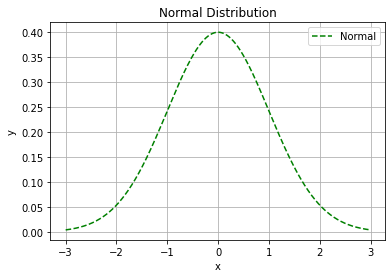

In [ ]:
x = np.arange(-3,3,0.01)

# 正規分布の確率密度関数を，緑色，破線で描画する
plt.plot(x,stats.norm.pdf(x,loc=0,scale=1), "--", color="green", label="Normal")
plt.title("Normal Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

1. $t_2$

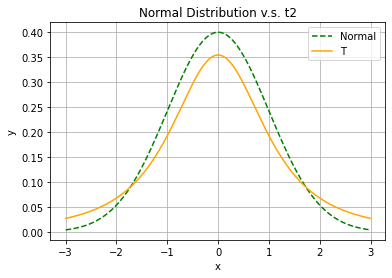

In [ ]:
x = np.arange(-3,3,0.01)

plt.plot(x,stats.norm.pdf(x,loc=0,scale=1), "--", color="green", label="Normal")
plt.plot(x,stats.t.pdf(x,df=2), color="orange", label="T2")
plt.title("Normal Distribution v.s. t2")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


2. $t_{10}$

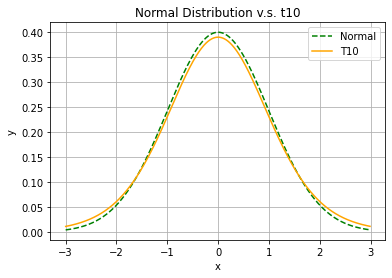

In [ ]:
x = np.arange(-3,3,0.01)

plt.plot(x,stats.norm.pdf(x,loc=0,scale=1), "--", color="green", label="Normal")
plt.plot(x,stats.t.pdf(x,df=10), color="orange", label="T10")
plt.title("Normal Distribution v.s. t10")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


3. $t_{30}$

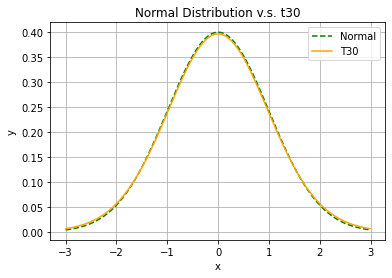

In [ ]:
x = np.arange(-3,3,0.01)

plt.plot(x,stats.norm.pdf(x,loc=0,scale=1), "--", color="green", label="Normal")
plt.plot(x,stats.t.pdf(x,df=30), color="orange", label="T30")
plt.title("Normal Distribution v.s. t30")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


4. $t_{100}$

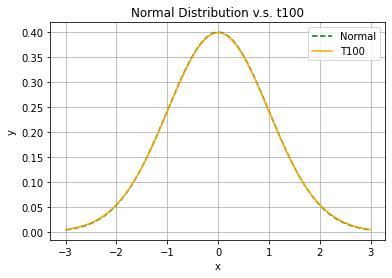

In [ ]:
x = np.arange(-3,3,0.01)

plt.plot(x,stats.norm.pdf(x,loc=0,scale=1), "--", color="green", label="Normal")
plt.plot(x,stats.t.pdf(x,df=100), color="orange", label="T100")
plt.title("Normal Distribution v.s. t100")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


#### 考察

自由度$n$が大きくなるほど，t分布と標準正規分布の確率密度関数のグラフは近寄って見える．


## 例題2-問題3

ある機械で生産された$10$個の製品の重量を測定したところ
$$
101.1, 103.2. 102.1, 99.2, 100.5, 101.3, 99.7, 100.5, 98.9, 101.4 \quad [\text{g}]
$$
のような結果を得た．

測定結果については，次のコードから取得せよ．

In [ ]:
data = [101.1, 103.2, 102.1, 99.2, 100.5, 101.3, 99.7, 100.5, 98.9, 101.4]
series = pd.Series(data)

0. （仮説の設定）母平均は$100\text{g}$と考えてよいだろうか．
この検証のために，仮説検定を行いたい．
帰無仮説$H_0$と対立仮説は何であるべきか．
下のセルに書き込め．

帰無仮説$H_0$: $\mu = 100$

対立仮説$H_1$: $\mu \neq 100$

1. （直接立式して計算）母平均は$100\text{g}$と考えてよいだろうか．
次の手順で計算を行うことにより，有意水準$5\%$で検定せよ．
必要ならば，コード記述欄の下の**ヒント**も参考にせよ．

    1. `series`に含まれるデータの平均と不偏標本分散の正の平方根を，それぞれ変数`m`，`s`に入れる．
    1. `u`にt分布の上位$2.5\\%$点の値を入れる．
    1. t統計量`t`を計算する．
    1. `t>=0`ならば，`t`と`u`の値を比較する．（帰無仮説$H_0$が棄却できないときに，ブール値`True`を吐くようにするにはどうすればよいだろうか．）`t<0`ならば，`-t`と`u`の値を比較する．帰無仮説$H_0$が棄却される場合は`False`，棄却されない場合は`True`を表示するようにせよ．


In [ ]:
m = np.mean(series)
s = np.std(series, ddof=1)
t = (m - 100)/(s/np.sqrt(10))
u = stats.t.ppf(0.975,df=9)
print("t統計量: {:.3f}，上位2.5%点: {:.3f}".format(t,u))
if t >= 0:
    print(t < u)
else:
    print(-t < u)

t統計量: 1.891，上位2.5%点: 2.262
True


##### ヒント

* `Series`オブジェクトに対しては，`numpy`モジュールの関数`np.mean(Series)`，`np.var(Series,ddof=1)`でそれぞれ標本平均，不偏標本分散が計算できる．`np.var()`の`ddof`の値を`0`にすると，不偏でない標本分散（データを母集団とみなした分散），`1`にすると，不偏標本分散（データを母集団から抽出した標本とみなした分散）が計算される．

* 数値に対して，その平方根を計算するには，`numpy`モジュールの関数`np.sqrt()`が利用できる．
なお，`np.sqrt(np.var())`は，標準偏差を与える関数`np.std()`と同等である．関数`np.std()`においても`ddof`の値を設定できる．

* 自由度`n`のt分布の上位$100\alpha\%$点を与える関数は，`scipy.stats`で提供されている
```
stats.t.ppf(1-a,df=n)
```
が利用できる．
    * （補足）`1-a`の理由: 統計学の教科書では，通常$100\alpha\%$点というと上から$100\alpha\%$の$x$座標を表すのであるが，pythonでは下から$100\alpha\%$の$x$座標を表す流儀（つまり累積分布関数の逆関数）のようである．

* 不等式や等式は，ブール値（「真（`True`）」「偽（`False`）」の$2$値）として扱われる．
```
2 < 3 # 実行すると「True」が表示される．以下同様
2 > 3 # False
2 == 3 # False
2 != 3 # True
```

    * （補足）ブール値は，`and`，`or`，`not`を演算子にもつブール代数をなす．
    ```
    True and False # False
    True or False # True
    not True # False
    ```

2. （関数利用）母平均は$100\text{g}$と考えてよいだろうか．
次の手順で計算を行うことにより，有意水準$5\%$で検定せよ．

    1. `stats.ttest_1samp(Data, Popmean)`で標本`Data`と帰無仮説で仮定する母平均`Popmean`から，自動的に取得された自由度によるt分布の検定統計量`t`と$p$値`p`（検定統計量`t`の，分布の上位または下位からの割合の小さいほう）が得られる．構文は
```
t, p = stats.ttest_1samp(Data, Popmean)
```
である．

    2. 求めるべきは，この$p$値`p`が有意水準の半分である$0.025$より小さいか否かである．$p>0.025$であるとき，`t`統計量の値はそれほど稀な事象ではないということであり，帰無仮説$H_0$は棄却されない．$p<0.025$のとき，帰無仮説$H_0$は棄却される．よって，`p>0.025`となるときに`True`が吐き出されるようにすればよい．

In [ ]:
t, p = stats.ttest_1samp(series,100)
print("t統計量: {:.3f}，p値: {:.3f}".format(t,p))
print(p > 0.025)

t統計量: 1.891，p値: 0.091
True


3. （復習，直接立式して計算）上の測定結果をもとに，製品の重量の母平均の信頼度$95\%$信頼区間を求めよ．
また，上の検定結果と比較し，それぞれの意味について考察せよ．

なお，自由度$n$のt分布の$2.5\%$点を$t_{n,0.025}$と表すと，信頼度$95\%$の信頼区間における上側信頼限界，下側信頼限界はそれぞれ
$$
\overline{x} \pm t_{n, 0.025} \cdot \frac{\hat{s}}{\sqrt{n}}
$$

In [ ]:
d = stats.t.ppf(0.975,df=9)*s/np.sqrt(10)
print("95%信頼区間は，[{:.3f},{:.3f}]で与えられる".format(m-d,m+d))

95%信頼区間は，[99.845,101.735]で与えられる


4. （関数利用）上の測定結果をもとに，次の手順に従い，製品の重量の母平均の信頼度$95\%$信頼区間を求めよ．

    1. 不偏分散を$\hat{S}^2$とすると，大きさ$n$の標本の**標準誤差**（標本平均の標準偏差）は$\hat{S}/\sqrt{n}$と書ける．
この標準誤差を`seq`に格納すると，母平均の信頼度$100\alpha\%$信頼区間は，
```
# m: 標本平均，n-1: 自由度，100*a: 信頼度
stats.t.interval(alpha=a, df=n-1, loc=m, scale=sep)
```
で計算される．

In [ ]:
sep = s / np.sqrt(10)
stats.t.interval(alpha=0.95, df=9, loc=m, scale=sep)

(99.84490429555976, 101.73509570444023)

#### 考察

（考察内容の記入）

# ＜本授業の学び＞
本授業で学んだことを，下のテキストボックスに記入して下さい．

（ここに本授業の学びを記入する）